# 1.透视表

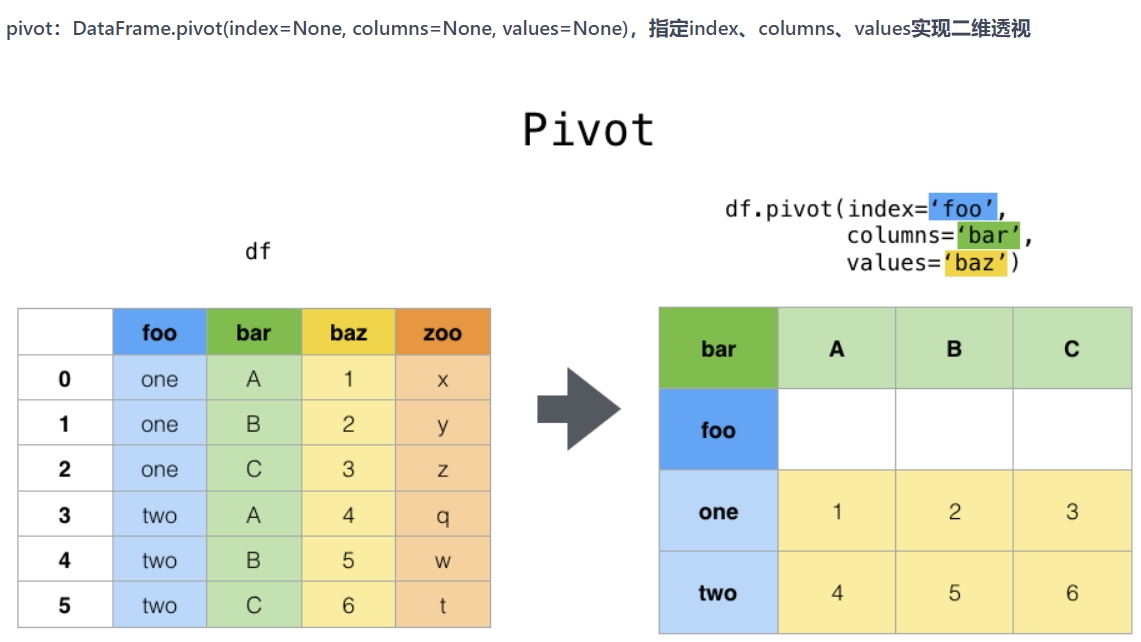

In [2]:
# <img src='d:/aa/pivot透视表示意图.jpg', width=100, height=60>   #该方法只能是相对路径
#插入示意图
from IPython.display import Image
Image(filename = 'pivot透视表示意图.jpg', width=1000, height=600)

In [3]:
import pandas as pd
import numpy as np
#透视表-简单例子


df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo","bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two","one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small","small", "large", "small", "small","large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [4]:
#AB列的值作行索引，C的值作列索引，D的值作聚合求和 ,E做均值聚合
table1 = pd.pivot_table(df, index=['A', 'B'],columns=['C'],values=['D','E'],  
                        aggfunc={'D':np.sum,'E':np.mean})
table1

D           E      
C       large small large small
A   B                          
bar one   4.0   5.0   6.0   8.0
    two   7.0   6.0   9.0   9.0
foo one   4.0   1.0   4.5   2.0
    two   NaN   6.0   NaN   5.5

In [5]:
#如果去除value，则自动对df中剩余字段DE作统计，省略aggfunc，默认求平均值
table2 = pd.pivot_table(df, index=['A', 'B'],columns=['C'])
table2

D           E      
C       large small large small
A   B                          
bar one   4.0   5.0   6.0   8.0
    two   7.0   6.0   9.0   9.0
foo one   2.0   1.0   4.5   2.0
    two   NaN   3.0   NaN   5.5

In [6]:
# 还可以增加其他参数，如 fill_value = 0 0填充空值
# margins = True 对行列进行z总体值统计

table3 = pd.pivot_table(df, index=['A', 'B'],columns=['C'],values=['D','E'],  
                        aggfunc={'D':np.sum,'E':np.mean},
                        fill_value = 0, margins = True   )
table3.round(2)       

D               E            
C       large small All large small   All
A   B                                    
bar one     4     5   9   6.0   8.0  7.00
    two     7     6  13   9.0   9.0  9.00
foo one     4     1   5   4.5   2.0  3.67
    two     0     6   6   0.0   5.5  5.50
All        15    18  33   6.0   6.0  6.00

In [7]:
#透视表的类型也是数据框
type(table2)

pandas.core.frame.DataFrame

# 透视表综合练习

In [1]:
# 1. 读入 “北京天气2018.xlsx” 的相关列 ['日期','高温','低温','空气质量']  
# 2. 增加日期索引（以月份为单位），处理数据（去除 ℃ 符号）
# 3. 增加“质量等级”列，对应 { 1:'优', 2 :'良', 3:'轻度污染', 4:'中度污染', 5:'重度污染'   }
# 4. 以月份作为index，‘质量等级’作为columns，统计每个月各类质量等级的天数
# 5. 以月份作为index，‘质量等级’作为columns，统计每个月各类质量等级的高温均值和低温均值

In [2]:
# 1. 读入 “北京天气2018.xlsx” 的相关列 ['日期','高温','低温','空气质量']  
import pandas as pd
import numpy as np

# 读csv文件，默认utf-8
tianqi = pd.read_excel("北京天气2018.xlsx",usecols=['日期','高温','低温','空气质量'] ) #只读相关列
tianqi['日期']=pd.to_datetime(tianqi['日期'])
tianqi


,日期,高温,低温,空气质量
0,2018-01-01,3℃,-6℃,2
1,2018-01-02,2℃,-5℃,1
2,2018-01-03,2℃,-5℃,1
3,2018-01-04,0℃,-8℃,1
4,2018-01-05,3℃,-6℃,1
...,...,...,...,...
360,2018-12-27,-5℃,-12℃,1
361,2018-12-28,-3℃,-11℃,1
362,2018-12-29,-3℃,-12℃,1
363,2018-12-30,-2℃,-11℃,1


In [3]:
# 2. 增加日期索引（以月份为单位），处理数据（去除 ℃ 符号）

#设置月的索引，去除摄氏度符号，并把温度转为整型
print(tianqi.dtypes)
tianqi = tianqi.astype({'高温':'string','低温':'string'})
tianqi['高温']=tianqi['高温'].str.replace('℃','').astype('int32')
tianqi['低温']=tianqi['低温'].str.replace('℃','').astype('int32')
print(tianqi.dtypes)
tianqi

日期      datetime64[ns]
高温              object
低温              object
空气质量             int64
dtype: object
日期      datetime64[ns]
高温               int32
低温               int32
空气质量             int64
dtype: object


,日期,高温,低温,空气质量
0,2018-01-01,3,-6,2
1,2018-01-02,2,-5,1
2,2018-01-03,2,-5,1
3,2018-01-04,0,-8,1
4,2018-01-05,3,-6,1
...,...,...,...,...
360,2018-12-27,-5,-12,1
361,2018-12-28,-3,-11,1
362,2018-12-29,-3,-12,1
363,2018-12-30,-2,-11,1


In [4]:
tianqi1 = tianqi
tianqi1['月'] = tianqi['日期'].dt.month
tianqi1

,日期,高温,低温,空气质量,月
0,2018-01-01,3,-6,2,1
1,2018-01-02,2,-5,1,1
2,2018-01-03,2,-5,1,1
3,2018-01-04,0,-8,1,1
4,2018-01-05,3,-6,1,1
...,...,...,...,...,...
360,2018-12-27,-5,-12,1,12
361,2018-12-28,-3,-11,1,12
362,2018-12-29,-3,-12,1,12
363,2018-12-30,-2,-11,1,12


In [5]:
tianqi2 = tianqi1.groupby('月').agg({'高温':'mean','低温':'mean','空气质量':'mean'}).round(3)
tianqi2['空气质量'] = tianqi2['空气质量'].astype('int64')
tianqi2

,高温,低温,空气质量
月,,,
1,1.323,-7.290,1
2,4.893,-5.750,2
3,14.129,2.161,2
4,20.867,9.467,2
5,27.935,16.129,2
6,33.000,21.600,2
7,31.774,24.194,1
8,30.903,23.097,1
9,26.033,15.800,1


In [6]:
# 3. 增加 “质量等级” 列，对应 { 1:'优', 2 :'良', 3:'轻度污染', 4:'中度污染', 5:'重度污染'   }
dict1 = {1:'优', 2 :'良', 3:'轻度污染', 4:'中度污染', 5:'重度污染'}
tianqi1['质量等级'] = tianqi1['空气质量'].map(dict1)
tianqi1

,日期,高温,低温,空气质量,月,质量等级
0,2018-01-01,3,-6,2,1,良
1,2018-01-02,2,-5,1,1,优
2,2018-01-03,2,-5,1,1,优
3,2018-01-04,0,-8,1,1,优
4,2018-01-05,3,-6,1,1,优
...,...,...,...,...,...,...
360,2018-12-27,-5,-12,1,12,优
361,2018-12-28,-3,-11,1,12,优
362,2018-12-29,-3,-12,1,12,优
363,2018-12-30,-2,-11,1,12,优


In [18]:
# 4. 以月份作为index，‘质量等级’作为columns，统计每个月各类质量等级的天数
# lista = tianqi1['质量等级'].unique()
# for i in lista:
#     tianqi1[i] = 0
# tianqi1
# tianqi3 = tianqi1.groupby('月').agg({'质量等级':'count'})
# tianqi3
tianqi1['计数'] = 1
t1 = pd.pivot_table(tianqi1, index=['月'],columns=['质量等级'],values=['计数'],
                    aggfunc={'计数':'count'},
                        fill_value = 0, margins = True   )
t1

计数                         
质量等级 中度污染    优    良 轻度污染 重度污染  All
月                                 
1       1   16   10    4    0   31
2       2    9   12    4    1   28
3       3    2   12    9    5   31
4       3    6    9   10    2   30
5       5    5   14    7    0   31
6       1    3   19    7    0   30
7       0    8   18    5    0   31
8       0   15   15    1    0   31
9       0   17   11    2    0   30
10      3   17    7    4    0   31
11      1    6   11    8    4   30
12      2   11   12    5    1   31
All    21  115  150   66   13  365

In [8]:
x = 0
for i in tianqi1['质量等级']:
    tianqi1.loc[x,i] = 1
    x += 1
tianqi1

,日期,高温,低温,空气质量,月,质量等级,良,优,轻度污染,中度污染,重度污染
0,2018-01-01,3,-6,2,1,良,1,0,0,0,0
1,2018-01-02,2,-5,1,1,优,0,1,0,0,0
2,2018-01-03,2,-5,1,1,优,0,1,0,0,0
3,2018-01-04,0,-8,1,1,优,0,1,0,0,0
4,2018-01-05,3,-6,1,1,优,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,1,12,优,0,1,0,0,0
361,2018-12-28,-3,-11,1,12,优,0,1,0,0,0
362,2018-12-29,-3,-12,1,12,优,0,1,0,0,0
363,2018-12-30,-2,-11,1,12,优,0,1,0,0,0


In [9]:
dict2 = {}
for i in lista:
    dict2[i] = 'sum'
tianqi3 = tianqi1.groupby('月').agg(dict2)
tianqi3

,良,优,轻度污染,中度污染,重度污染
月,,,,,
1,10,16,4,1,0
2,12,9,4,2,1
3,12,2,9,3,5
4,9,6,10,3,2
5,14,5,7,5,0
6,19,3,7,1,0
7,18,8,5,0,0
8,15,15,1,0,0
9,11,17,2,0,0


In [19]:
# 5. 以月份作为index，‘质量等级’作为columns，统计每个月各类质量等级的高温均值和低温均值
#高温均值
# x = 0
# for i in tianqi1['质量等级']:
#     tianqi1.loc[x,i] = tianqi1.loc[x,'高温']
#     x += 1
# tianqi1
t2 = pd.pivot_table(tianqi1, index=['月'],columns=['质量等级'],values=['高温','低温'],
                    aggfunc={'高温':np.mean,'低温':np.mean},
                        fill_value = 0, margins = True   )
t2

低温                                                         \
质量等级       中度污染          优          良       轻度污染       重度污染        All   
月                                                                        
1     -5.000000  -8.062500  -6.700000  -6.250000   0.000000  -7.290323   
2     -2.000000  -7.111111  -6.583333  -3.500000   0.000000  -5.750000   
3      2.666667  -2.500000   0.083333   3.222222   6.800000   2.161290   
4     14.333333   7.166667   7.111111  11.200000  11.000000   9.466667   
5     16.400000  15.000000  16.785714  15.428571   0.000000  16.129032   
6     25.000000  20.000000  21.526316  22.000000   0.000000  21.600000   
7      0.000000  23.625000  24.333333  24.600000   0.000000  24.193548   
8      0.000000  22.000000  24.000000  26.000000   0.000000  23.096774   
9      0.000000  14.941176  16.454545  19.500000   0.000000  15.800000   
10     8.666667   5.705882   7.428571   9.250000   0.000000   6.838710   
11    -3.000000   0.166667  -0.272727  -1.000000   4.000000   0.100000   
12    -1.500000  -9.636364  -6.333333  -6.600000   2.000000  -6.967742   
All    8.047619   6.478261  10.100000   8.303030   5.692308   8.358904   

             高温                                                         
质量等级       中度污染          优          良       轻度污染       重度污染        All  
月                                                                       
1      6.000000  -0.125000   2.400000   3.250000   0.000000   1.322581  
2      9.000000   3.444444   4.250000   7.500000   7.000000   4.892857  
3     18.000000   9.000000  10.583333  15.777778  19.400000  14.129032  
4     28.000000  17.166667  17.333333  23.200000  25.500000  20.866667  
5     29.200000  28.200000  28.000000  26.714286   0.000000  27.935484  
6     36.000000  30.000000  33.368421  32.857143   0.000000  33.000000  
7      0.000000  29.125000  32.500000  33.400000   0.000000  31.774194  
8      0.000000  29.733333  31.733333  36.000000   0.000000  30.903226  
9      0.000000  25.470588  26.454545  28.500000   0.000000  26.033333  
10    19.000000  18.705882  19.428571  19.250000   0.000000  18.967742  
11     9.000000  10.500000  11.000000  10.500000  13.000000  10.966667  
12     7.500000  -1.090909   3.500000   4.000000   9.000000   2.387097  
All   20.238095  16.191304  20.233333  19.318182  16.615385  18.665753

In [11]:
dict3 = {}
for i in lista:
    dict3[i] = 'sum'
tianqi4 = tianqi1.groupby('月').agg(dict3)
tianqi4

,良,优,轻度污染,中度污染,重度污染
月,,,,,
1,24,-2,13,6,0
2,51,31,30,18,7
3,127,18,142,54,97
4,156,103,232,84,51
5,392,141,187,146,0
6,634,90,230,36,0
7,585,233,167,0,0
8,476,446,36,0,0
9,291,433,57,0,0


In [12]:
#高温均值 
tianqi5 = (tianqi4/tianqi3).round(3)
tianqi5

,良,优,轻度污染,中度污染,重度污染
月,,,,,
1,2.400,-0.125,3.250,6.0,NaN
2,4.250,3.444,7.500,9.0,7.0
3,10.583,9.000,15.778,18.0,19.4
4,17.333,17.167,23.200,28.0,25.5
5,28.000,28.200,26.714,29.2,NaN
6,33.368,30.000,32.857,36.0,NaN
7,32.500,29.125,33.400,NaN,NaN
8,31.733,29.733,36.000,NaN,NaN
9,26.455,25.471,28.500,NaN,NaN


In [13]:
#低温均值
x = 0
for i in tianqi1['质量等级']:
    tianqi1.loc[x,i] = tianqi1.loc[x,'低温']
    x += 1
tianqi1

,日期,高温,低温,空气质量,月,质量等级,良,优,轻度污染,中度污染,重度污染
0,2018-01-01,3,-6,2,1,良,-6,0,0,0,0
1,2018-01-02,2,-5,1,1,优,0,-5,0,0,0
2,2018-01-03,2,-5,1,1,优,0,-5,0,0,0
3,2018-01-04,0,-8,1,1,优,0,-8,0,0,0
4,2018-01-05,3,-6,1,1,优,0,-6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,1,12,优,0,-12,0,0,0
361,2018-12-28,-3,-11,1,12,优,0,-11,0,0,0
362,2018-12-29,-3,-12,1,12,优,0,-12,0,0,0
363,2018-12-30,-2,-11,1,12,优,0,-11,0,0,0


In [14]:
dict3 = {}
for i in lista:
    dict3[i] = 'sum'
tianqi4 = tianqi1.groupby('月').agg(dict3)
tianqi4

,良,优,轻度污染,中度污染,重度污染
月,,,,,
1,-67,-129,-25,-5,0
2,-79,-64,-14,-4,0
3,1,-5,29,8,34
4,64,43,112,43,22
5,235,75,108,82,0
6,409,60,154,25,0
7,438,189,123,0,0
8,360,330,26,0,0
9,181,254,39,0,0


In [15]:
#低温均值 
tianqi5 = (tianqi4/tianqi3).round(3)
tianqi5

,良,优,轻度污染,中度污染,重度污染
月,,,,,
1,-6.700,-8.062,-6.250,-5.000,NaN
2,-6.583,-7.111,-3.500,-2.000,0.0
3,0.083,-2.500,3.222,2.667,6.8
4,7.111,7.167,11.200,14.333,11.0
5,16.786,15.000,15.429,16.400,NaN
6,21.526,20.000,22.000,25.000,NaN
7,24.333,23.625,24.600,NaN,NaN
8,24.000,22.000,26.000,NaN,NaN
9,16.455,14.941,19.500,NaN,NaN


# 2.删除重复值

In [16]:
import pandas as pd
import numpy as np

# 读csv文件，detail_duplicates.csv
# 用drop_duplicats方法删除重复行
'''
df.drop_duplicates()

subset： 输入要进行去重的列名，默认为None
keep：   可选参数有三个：‘first’、 ‘last’、 False， 默认值 ‘first’。
         first表示： 保留第一次出现的重复行，删除后面的重复行。
         last表示： 删除重复项，保留最后一次出现。
         False表示： 删除所有重复项。
inplace：布尔值，默认为False

'''
dups=pd.read_csv("detail_duplicates.csv",encoding='gbk') 
print(dups)
# print(dups.shape)
# print(dups.drop_duplicates())
# dups.drop_duplicates('order_id')

dups.drop_duplicates(subset=['order_id','dishes_name'])

    order_id dishes_name  counts  amounts
0        NaN       酸辣土豆丝     1.0     49.0
1        NaN         NaN     1.0     48.0
2      417.0      香干回锅肉      1.0     30.0
3      417.0       番茄鸡蛋汤    25.0      NaN
4      417.0        鱼香肉丝    13.0      NaN
5        NaN         NaN     NaN      NaN
6      301.0        土豆牛腩     1.0     55.0
7      417.0       番茄鸡蛋汤    25.0      NaN
8      301.0       番茄鸡蛋汤    25.0      NaN
9      301.0        清蒸鲈鱼     1.0     32.0
10     417.0         清汤面     1.0     48.0


,order_id,dishes_name,counts,amounts
0,NaN,酸辣土豆丝,1.0,49.0
1,NaN,NaN,1.0,48.0
2,417.0,香干回锅肉,1.0,30.0
3,417.0,番茄鸡蛋汤,25.0,NaN
4,417.0,鱼香肉丝,13.0,NaN
6,301.0,土豆牛腩,1.0,55.0
8,301.0,番茄鸡蛋汤,25.0,NaN
9,301.0,清蒸鲈鱼,1.0,32.0
10,417.0,清汤面,1.0,48.0


# 3.删除异常值


In [17]:
#读入文件 “meal_order_detail.xlsx”，检测其中的异常值

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #快速绘图模块

orders=pd.read_csv("meal_order_detail.csv",encoding='gbk')
orders


,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2352,366,609967,NaN,NaN,香酥两吃大虾,0,1,89,NaN,2016/8/11 11:49,NaN,NaN,NaN,0,NaN,NaN,caipu/101002.jpg,1159
1,2354,366,609961,NaN,NaN,姜葱炒花蟹,0,1,45,NaN,2016/8/11 11:51,NaN,NaN,NaN,0,NaN,NaN,caipu/102001.jpg,1159
2,2356,366,606000,NaN,NaN,香烤牛排\r\n\r\n\r\n,0,1,55,NaN,2016/8/11 11:52,NaN,NaN,NaN,0,NaN,NaN,caipu/201001.jpg,1159
3,2358,366,606106,NaN,NaN,铁板牛肉,0,1,66,NaN,2016/8/11 11:53,NaN,NaN,NaN,0,NaN,NaN,/jsp/pc/images/606106.jpg,1159
4,2361,366,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016/8/11 11:54,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,3856,1125,610011,NaN,NaN,白饭/大碗,0,1,10,NaN,2016/8/20 22:06,NaN,NaN,NaN,0,NaN,NaN,caipu/601005.jpg,1110
3643,3857,1125,610020,NaN,NaN,泡椒凤爪\r\n\r\n\r\n,0,1,58,NaN,2016/8/20 22:07,NaN,NaN,NaN,0,NaN,NaN,caipu/204003.jpg,1110
3644,3858,1125,610048,NaN,NaN,拌土豆丝,0,1,25,NaN,2016/8/20 22:07,NaN,NaN,NaN,0,NaN,NaN,caipu/301002.jpg,1110
3645,3859,1125,609996,NaN,NaN,牛尾汤,0,1,40,NaN,2016/8/20 22:08,NaN,NaN,NaN,0,NaN,NaN,caipu/201006.jpg,1110


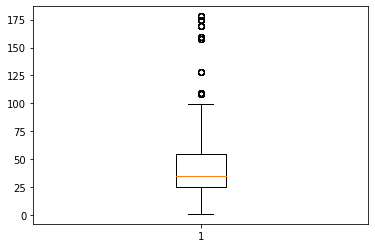

In [18]:
#画箱线图，以单价为列
plt.boxplot(orders['amounts'])
plt.show()


In [19]:
#pandas不能直接处理异常值
#所以，将异常值置为空值，再进行处理

#定义替换函数，形参x是系列
def replace(x):
    QU=x.quantile(0.75)
    QL=x.quantile(0.25)
    IQR=QU-QL
    index=(x>(QU+1.5*IQR)) |(x< (QL-1.5*IQR))
    x[index]=np.nan
    return x

orders['amounts'].isnull().sum()  #0个缺失值

orders['amounts']=replace(orders['amounts'])

orders['amounts'].isnull().sum()  #173个缺失值


#删除amounts列缺失的行

orders.shape  #  (2779, 19)

orders.dropna(subset=['amounts'],inplace=True)

orders.shape  #  (2606, 19)

<ipython-input-19-eb0770293733>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[index]=np.nan


(3447, 19)

In [20]:
# 【练习】 仿照上面的形式，利用三西格玛原则，删除源文件中 amounts 列的异常值
orders1=pd.read_csv("meal_order_detail.csv",encoding='gbk')
orders1.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2352,366,609967,NaN,NaN,香酥两吃大虾,0,1,89,NaN,2016/8/11 11:49,NaN,NaN,NaN,0,NaN,NaN,caipu/101002.jpg,1159
1,2354,366,609961,NaN,NaN,姜葱炒花蟹,0,1,45,NaN,2016/8/11 11:51,NaN,NaN,NaN,0,NaN,NaN,caipu/102001.jpg,1159
2,2356,366,606000,NaN,NaN,香烤牛排\r\n\r\n\r\n,0,1,55,NaN,2016/8/11 11:52,NaN,NaN,NaN,0,NaN,NaN,caipu/201001.jpg,1159
3,2358,366,606106,NaN,NaN,铁板牛肉,0,1,66,NaN,2016/8/11 11:53,NaN,NaN,NaN,0,NaN,NaN,/jsp/pc/images/606106.jpg,1159
4,2361,366,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016/8/11 11:54,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1159


In [22]:
def replace1(x):
    index=(x>(x.mean()+3*x.std())) |(x< (x.mean()-3*x.std()))
    x[index]=np.nan
    return x
orders1['amounts'].isnull().sum()

0

In [23]:
orders1['amounts']=replace1(orders1['amounts'])
orders1['amounts'].isnull().sum()

<ipython-input-22-f8f1cb44b1ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[index]=np.nan


148

In [25]:
orders1.shape

(3647, 19)

In [26]:
orders1.dropna(subset=['amounts'],inplace=True)

In [27]:
orders1.shape 

(3499, 19)